# Prédiction des prix de l'immobilier à Boston dans les années 1970

La prédiction du prix de maisons bostoniennes des années 1970, dont les données sont issues de la base *Boston House Prices*, créée par D. Harrison et D.L. Rubinfeld à l'Université de Californie à Irvine (http://archive.ics.uci.edu/ml/machine-learning-databases/housing/), est un problème classique d'apprentissage supervisé.

<img src="https://1.bp.blogspot.com/-sCZIatDf9LQ/XGm-lEHXnAI/AAAAAAAAPxQ/kv8S8fdgudAwWTFuJhuAoiykLmWLCoOtgCLcBGAs/s1600/197010xx-GovernmentCenter-Boston_resize.JPG" width=600 />

Plus précisément, le label à prédire dans cette base de données est le prix médian par quartier de l'immobilier (en milliers de dollars). Il s'agit donc d'un problème de régression puisque l'on veut inférer des valeurs continues. Pour ce faire, on dispose de 13 entrées offrant les informations suivantes :

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- TAX - full-value property-tax rate per \$10,000
- RAD - index of accessibility to radial highways
- PTRATIO - pupil-teacher ratio by town
- B $ = 1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - percentage lower status of the population

L'objectif de ce TP est d'arriver à prédire au plus près les valeurs médianes de prix de maison par quartier.


![Texte alternatif…](https://miro.medium.com/max/763/1*i9vZk7NkS1dZz6JEcbV5nA.png)

In [1]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

%matplotlib inline

2024-09-04 16:11:56.837650: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 16:11:57.115429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 16:11:57.861024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### _**Exercice** : Définir une fonction d'affichage `plot_loss` qui permet d'afficher erreur d'entraînement et de validation._

On pourra tracer les courbes associées aux erreurs d'entraînement/de validation par epoch. 

In [3]:
def plot_loss(val_loss, train_loss, ymax=100):
    plt.plot(val_loss, label="Validation")
    plt.plot(train_loss, label="Entrainement")
    plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
    plt.legend()

In [4]:
# %load solutions/plot_loss.py

## Préparation des données

On commence par charger les données d'entraînement et de test.

In [5]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Input

from sklearn.model_selection import train_test_split

In [6]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

## Approche simple à corriger

Nous allons commencer par créer un perceptron multicouche élementaire.

### Création du modèle

La fonction `Sequential` permet d'instancier un réseau de neuronnes, la fonction `add` permet d'ajouter une couche au réseau, enfin la fonction `Dense` correspond à un perceptron (monocouche).

In [19]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Entrainement du réseau

La fonction `compile` permet de passer les arguments nécessaires à l'entraînement du réseau. `history` stocke les calculs de la loss pour chacune des epochs.

In [20]:
optim = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 583.2877 - mae: 22.2287
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 573.7789 - mae: 22.1930
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 622.2209 - mae: 22.9031
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 549.8217 - mae: 21.8070
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 536.6993 - mae: 21.6492
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 574.8386 - mae: 22.2619
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 585.7552 - mae: 22.3821
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 636.8212 - mae: 23.2389
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 622.5090 - mae: 23.0461
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 572.4898 - mae: 22.1091
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 569.0556 - mae: 21.8571
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 584.7011 - ma

### Evaluation du modèle

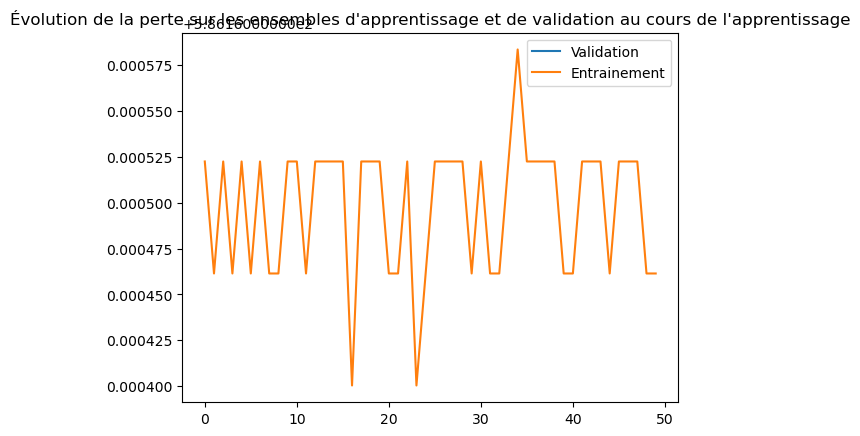

In [21]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [22]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 586.1717 - mae: 22.5703 


[615.8577880859375, 23.078432083129883]

On obtient une mae d'environ 22, ce qui signie que l'on est éloigné en moyenne de 22000$ de la vérité terrain.

## Travail à faire

L'approche présentée ci-dessus apporte des résultats décevants, en raison de  quelques maladresses, voire erreurs. Dans un premier temps, vous devez **trouver et corriger ces problèmes**.

Dans un second temps, cherchez à améliorer les performances du modèle. Vous pouvez atteindre sans trop de difficulté un score de MAE inférieur à 3 sur l'ensemble de test. A chaque nouveau test, vous devez évaluer si votre réseau est en sous-apprentissage, ou en sur-apprentissage, et en déduire des modifications possibles pour en améliorer les performances.

MAE de test à battre si vous aimez les défis : **2.20** !

### Correction du modèle précédent

Vous penserez à évaluer votre modèle à l'aide de la fonction `plot_loss` définie précédement et de la fonction `evaluate`.

In [98]:
new_model = Sequential()
new_model.add(Input(shape=(13,)))
new_model.add(Dense(8, activation='relu'))
new_model.add(Dense(1, activation='linear'))

In [99]:
optim = optimizers.Adam(learning_rate = 0.01)
new_model.compile(optimizer=optim, loss='mse', metrics=['mae'])
history = new_model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 7262.1631 - mae: 73.2324  
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 956.3650 - mae: 26.5209
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 430.9853 - mae: 16.7462
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 313.4165 - mae: 14.0966
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 204.8861 - mae: 11.5238
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 204.1658 - mae: 11.3029
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 163.5198 - mae: 10.1289
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 136.6501 - mae: 9.1069
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 125.2230 - mae: 8.8279
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 125.1049 - mae: 8.7858
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 121.8009 - mae: 8.6780
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 122.1121 - mae

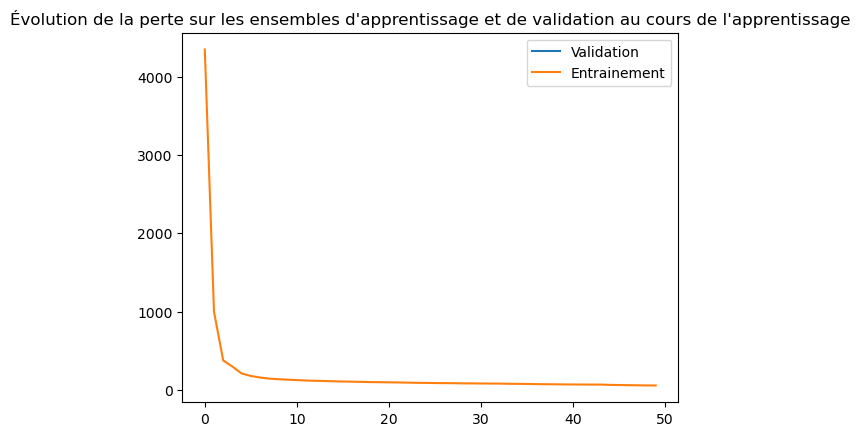

In [100]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [101]:
new_model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.8123 - mae: 5.2992 


[55.71420669555664, 5.560919284820557]

In [84]:
# %load solutions/correction.py

In [63]:
# %load solutions/evaluation.py

### Perceptron monocouche

Obtient-on des résultats comparables au réseau précédent avec un perceptron monocouche ?

In [107]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(1, activation='linear'))

In [108]:
optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 178433.2344 - mae: 412.5148
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 94720.0000 - mae: 299.8120
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 42435.0078 - mae: 198.8879
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 13895.7578 - mae: 112.4294
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 3294.7732 - mae: 52.2806
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 779.5750 - mae: 22.7864  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 322.6598 - mae: 14.2650
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 354.0836 - mae: 15.1847
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 334.0787 - mae: 14.6123 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 326.5901 - mae: 14.5026 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 313.6401 - mae: 14.1650
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 2

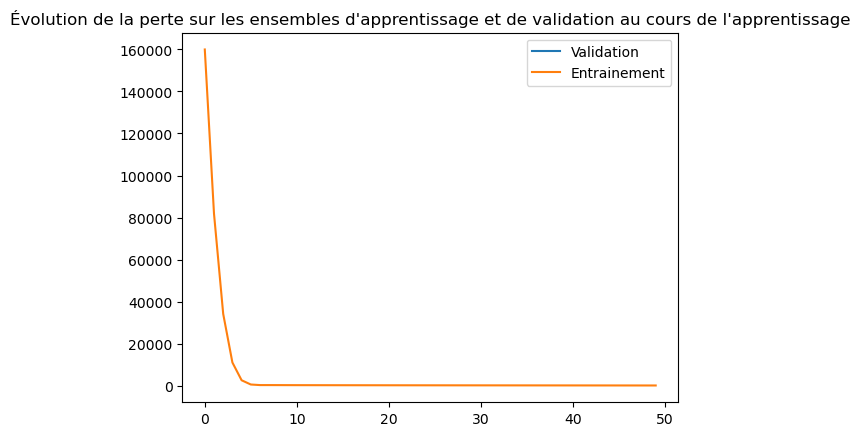

In [109]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [110]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.1724 - mae: 10.8659 


[193.9345703125, 10.867216110229492]

In [111]:
# %load solutions/monocouche.py

### Améliorations possibles

Avant de regarder les solutions proposées, prenez **vraiment** le temps de tester des architectures.

In [107]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(1, activation='linear'))

In [108]:
optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 178433.2344 - mae: 412.5148
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 94720.0000 - mae: 299.8120
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 42435.0078 - mae: 198.8879
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 13895.7578 - mae: 112.4294
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 3294.7732 - mae: 52.2806
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 779.5750 - mae: 22.7864  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 322.6598 - mae: 14.2650
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 354.0836 - mae: 15.1847
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 334.0787 - mae: 14.6123 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 326.5901 - mae: 14.5026 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 313.6401 - mae: 14.1650
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 2

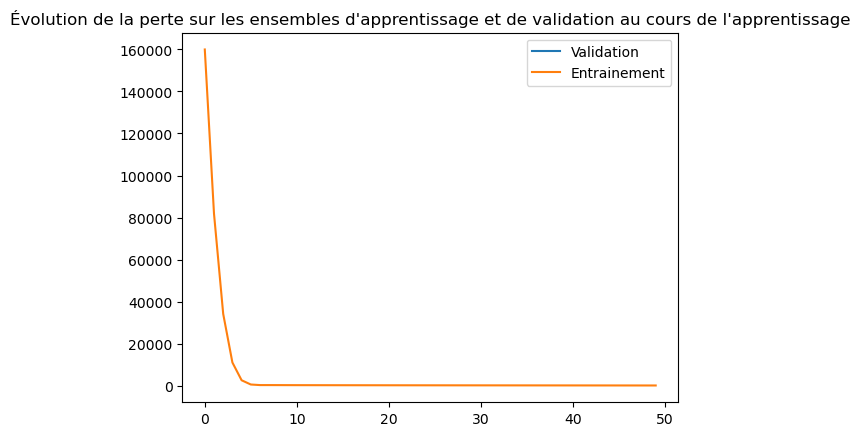

In [109]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [110]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.1724 - mae: 10.8659 


[193.9345703125, 10.867216110229492]

## Propositions d'améliorations

On peut certainement trouver de meilleures architectures !

### Amélioration n°1

In [115]:
# %load solutions/amelioration_1.py
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)

NameError: name 'x_val' is not defined

In [ ]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Amélioration n°2

In [ ]:
# %load solutions/amelioration_2.py

In [ ]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)